In [1]:
from PIL import Image
import numpy as np
from matplotlib.image import pil_to_array
import healpy as hp

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Earth image extracted from basemap:
# http://shadedrelief.com/natural3/ne3_data/16200/masks/water_16k.png
grayscale_pil_image = Image.open("./water_16k.png").convert("L")
image_array = pil_to_array(grayscale_pil_image)

/anaconda3/envs/gsm/lib/python3.10/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [4]:
print(image_array.shape)

(8100, 16200)


In [5]:
theta = np.linspace(0, np.pi, num=image_array.shape[0])[:, None]
phi = np.linspace(-np.pi, np.pi, num=image_array.shape[1])

In [9]:
nside = 512
print("Pixel area: %.2f square degrees" % hp.nside2pixarea(nside, degrees=True))

Pixel area: 0.01 square degrees


In [10]:
pix = hp.ang2pix(nside, theta, phi)
healpix_map = np.zeros(hp.nside2npix(nside), dtype=np.double)
healpix_map[pix] = image_array


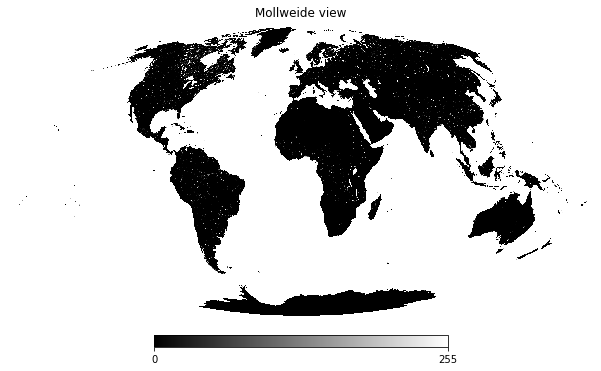

In [13]:
hp.mollview(healpix_map, cmap="gray", xsize=2000, flip="geo")